# Machine Learning Research Project



## Name: Rena Bi (rbi4), Sydney Friedel (sfriede5), Varun Harish (vharish1)

# Preprocess the data


In [ ]:
# if not uploaded, upload lung-scans-dataset.zip
# this unzips the file to folder lung-scans-dataset
!jar xvf /content/lung-scans-dataset.zip

In [51]:
# get the different image sets
covid_path="lung-scans-dataset/covid" # 256 x 256 
lung_op_path="lung-scans-dataset/lung-opacity" # 256 x 256
normal1_path="lung-scans-dataset/normal-1" # 256 x 256
normal2_path="lung-scans-dataset/normal-2" # 512 x 512
tuber_path="lung-scans-dataset/tuberculosis" # 512 x 512
pneum_path="lung-scans-dataset/viral-pneumonia" # 256 x 256

In [53]:
# import libraries
from PIL import Image
import os
import numpy as np

(1, 256, 256, 3)


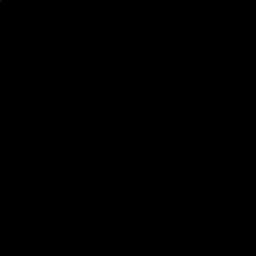

In [59]:
# convert covid images into numpy arrays
covid_X = np.empty((1, 256, 256, 3), dtype=np.uint8)
covid_y = np.empty(1) # 0

for img in os.listdir(covid_path):
  image_path=covid_path+"/"+img
  covid_X.append(np.array(Image.open(image_path)))
  covid_y.append(0)

print(covid_X.shape)
PIL_image = Image.fromarray(np.uint8(covid_X[0]))
display(PIL_image)

In [28]:
lung_op_X = np.empty((256, 256, 3), dtype=np.int8)
lung_op_y = np.empty(1) # 1

for img in os.listdir(lung_op_path):
  lung_op_X.append(np.array(Image.open(img)))
  lung_op_y.append(1)

In [30]:
normal1_X = np.empty((256, 256, 3), dtype=np.int8)
normal2_X = np.empty((256, 256, 3), dtype=np.int8) # originally 512 x 512
normal_y = np.empty(1) # 2

for img in os.listdir(normal1_path):
  normal1_X.append(np.array(Image.open(img)))

for img in os.listdir(normal2_path):
  image = Image.open(img) 
  scaled_img = image.resize((256, 256))
  normal2_X.append(np.array(scaled_img))

# remove duplicate images in the normal chest scans 
# since from two different datasets, but each referenced the same source
normal_X = np.stack(normal1_X, normal2_X)
normal_X = np.unique(normal_X)

for x in normal_X:
  normal_y.append(2)

FileNotFoundError: ignored

In [ ]:

tbc_X = np.empty((256, 256, 3), dtype=np.int8)
tbc_X = np.empty(1) # 3



In [ ]:
pneum_X= np.empty((256, 256, 3), dtype=np.int8)
pneum_y = np.empty(1) # 4


In [ ]:
# create train/test/val split for each category and label data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

# Baseline CNN Models for Medical Image Classification

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, Dropout, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.applications import VGG16
img_width = 224 # CHANGE
img_height = 224 # CHANGE

#model 0: very simple CNN from scratch
model0 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height,1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation = "softmax")
])
model0.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

#model 1: more complex CNN from scratch - uses dropout layers for regularization
#hyperparameter tuning: kernel size (try (2,2) and (4,4)), num_filters (try removing initial 16 layer and subsequent maxpooling layer), maxpooling size (try (3,3) and (4,4))
model1 = Sequential([
    Conv2D(16,(3,3),activation = "relu" , input_shape = (img_width,img_height,1)) ,
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation = "relu") ,  
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation = "relu") ,  
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation = "relu"),  
    MaxPooling2D(2,2),
    Flatten(), 
    Dense(550,activation="relu"),      #Adding the Hidden layer
    Dropout(0.1,seed = 2019),
    Dense(400,activation ="relu"),
    Dropout(0.3,seed = 2019),
    Dense(300,activation="relu"),
    Dropout(0.4,seed = 2019),
    Dense(200,activation ="relu"),
    Dropout(0.2,seed = 2019),
    Dense(4,activation = "softmax")   #Adding the Output Layer
])

#hyperparameter tuning: different optimizers (SGD, RMSprop) and learning rates (a few different ones depending on the optimizer)
adam=Adam(learning_rate=0.001)
model1.compile(optimizer=adam, loss='categorical_crossentropy', metrics = ['acc'])

#model 2: AlexNet architecture
model2 = Sequential([
    Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(img_width, img_height, 1)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3)),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='softmax')    
])
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=SGD(lr=0.001),
    metrics=['accuracy']    
)

#model 3: VGG16 with added training layers (transfer learning)
pre_trained_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
#freezing layers
for layer in pre_trained_model.layers:
  layer.trainable = False
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = GlobalMaxPooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)
model3 = Model(pre_trained_model.input, x)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


# Regularization Components and Training the Models (do hyperparameter tuning here)




In [ ]:
import numpy as np

#experiment with using these or not using them
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

#weighting classes to account for minority classes (diseased) versus majority class (normal)
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

#train and evaluate each model on test set
#also get predictions for future confusion matrices
#hyperparameter tuning: number epochs, weight or unweight, remove regularization (callback list)
n_epochs = 50
batch_size = 10

model0_history = model0.fit(train,epochs=n_epochs, validation_data=val, class_weight=cw, callbacks=callbacks_list)
test_loss, test_acc = model0.evaluate(test)
model0_preds = model_0.predict(test)

model1_history = model1.fit(train,epochs=n_epochs, validation_data=val, class_weight=cw, callbacks=callbacks_list)
test_loss, test_acc = model1.evaluate(test)
model1_preds = model_0.predict(test)


model2_history = model2.fit(train,epochs=n_epochs,validation_data=val,  class_weight=cw, callbacks=callbacks_list)
test_loss, test_acc = model2.evaluate(test)
model2_preds = model_0.predict(test)

model3_history = model3.fit(train,epochs = n_epochs,validation_data=val, class_weight=cw, callbacks=callbacks_list)
test_loss, test_acc = model3.evaluate(test)
model3_preds = model_0.predict(test)



# Accuracy Plots, Confusion Matrices, F-Beta Score Computations (TODO)

# Comparison of Best CNN with SVM and Decision Tree Models for Image Classification

In [ ]:
# defining and evaluating SVM classifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
svm_model=GridSearchCV(svc,param_grid)

svm_model.fit(train)
# model.best_params_ contains the best parameters obtained from GridSearchCV
svm_pred=model.predict(test)

#defining and evaluating classfier that uses CNN for feature extraction then SVM for classification
svm_cnn_model = Sequential([
    Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(img_width, img_height, 1)),
    Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(img_width, img_height, 1)),
    MaxPool2D(pool_size=(2,2),strides = 2),
    Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3),
    MaxPool2D(pool_size=(2,2),strides = 2),
    Flatten(),
    (Dense(128,activation="relu")
])
#svm output layer
n_classes = 4
svm_cnn_model.add(Dense(n_classes,kernel_regularizers = l2(0.01),activation= “softmax”))
svm_cnn_model.compile(optimizer=”adam”,loss=”squared_hinge”, metrics = [‘accuracy’])
svm_cnn_model_history = svm_cnn_model.fit(x = train, validation_data = val)


# another version
#the base model/feature extractor using a CNN
feature_extractor = Sequential([
  Conv2D(16,(5,5),padding='valid',input_shape = X_train.shape[1:]),
  Activation('relu'),
  MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'),
  Dropout(0.4),
  Conv2D(32,(5,5),padding='valid'),
  Activation('relu'),
  MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'),
  Dropout(0.6),
  Conv2D(64,(5,5),padding='valid'),
  Activation('relu'),
  Dropout(0.8),
  Flatten(),
  Dense(2),
  Activation('softmax'),
])

#feature extraction
model_feat = Model(inputs=feature_extractor.input,outputs=feature_extractor.get_layer('dense_1').output)
train_features = model_feat.predict(train)
test_features = model_feat.predict(test)

#fitting of SVM as a classifier and evaluating on test set
svm = SVC(kernel='rbf')
svm.fit(train_features,np.argmax(y_train,axis=1))
svm.score(test_features,np.argmax(y_test,axis=1))


# defining decision tree classifier
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(train)
rf_pred=model.predict(test)


#another version
#feature extractor with CNN (above)
#decision tree classifier
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
dt.fit(train_features,np.argmax(y_train,axis=1))
dt.score(test_features,np.argmax(y_test,axis=1))

# Visualizing Filters and Feature Maps of Best Performing Model


In [ ]:
# visualizing filters for early hidden layers
## TODO: use best_model

# retrieve weights from the second hidden layer
# cannot easily visualize filters lower down
from matplotlib import pyplot
filters, biases = best_model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
 # get the filter
 f = filters[:, :, :, i]
 # plot each channel separately
 for j in range(3):
 # specify subplot and turn of axis
 ax = pyplot.subplot(n_filters, 3, ix)
 ax.set_xticks([])
 ax.set_yticks([])
 # plot filter channel in grayscale
 pyplot.imshow(f[:, :, j], cmap='gray')
 ix += 1
# show the figure
pyplot.show()

#visualizing feature maps
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# redefine model to output right after the first hidden layer
short_model = Model(inputs=best_model.inputs, outputs=best_model.layers[1].output)
short_model.summary()
# load a test image with the required shape
img = load_img('img.jpg', target_size=(img_width, img_height))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = short_model.predict(img)
# plot all 64 maps in an 8x8 squares #TODO: change size to best_model's dimensions (or just keep as VGG16 for demonstration purposes?)
square = 8
ix = 1
for _ in range(square):
 for _ in range(square):
 # specify subplot and turn of axis
 ax = pyplot.subplot(square, square, ix)
 ax.set_xticks([])
 ax.set_yticks([])
 # plot filter channel in grayscale
 pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
 ix += 1
# show the figure
pyplot.show()

# (Would Like to Completes) - Performing Histogram Equalization and Seeing How Performance of Best Model Changes

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# histogram equalization function
def hist(img):
  img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
  img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
  hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
  return hist_equalization_result

img = cv2.imread('img.jpg',0)
